In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from datetime import datetime as dt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit as tss
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from scipy.special import expit
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("./BTC-USD.csv")
data = data.dropna()

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,7.488640e+07
1,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,9.962930e+07
2,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,1.555760e+08
3,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,2.000270e+08
4,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,2.755640e+08
...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
1823,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
1824,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
1825,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10


In [4]:
format = '%Y-%m-%d'
data['Date']= pd.to_datetime(data['Date'])
grouped = data.groupby(pd.DatetimeIndex(data['Date']).year)

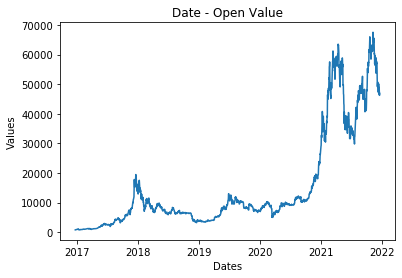

In [5]:
x = data['Date']
y1 = data['Open']
y2 = data['High']
y3 = data['Low']
y4 = data['Close']
y5 = data['Adj Close']
y6 = data['Volume']
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - Open Value')
plt.plot(x, y1)
plt.show()

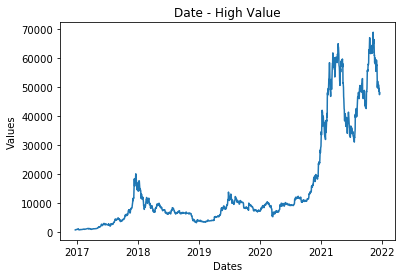

In [6]:
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - High Value')
plt.plot(x, y2)
plt.show()

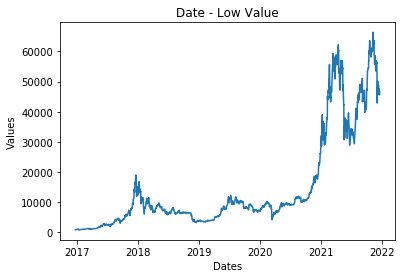

In [7]:
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - Low Value')
plt.plot(x, y3)
plt.show()

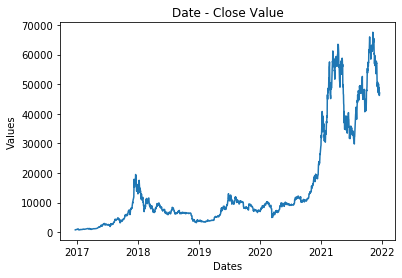

In [8]:
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - Close Value')
plt.plot(x, y4)
plt.show()

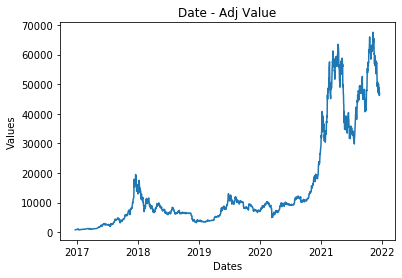

In [9]:
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - Adj Value')
plt.plot(x, y5)
plt.show()

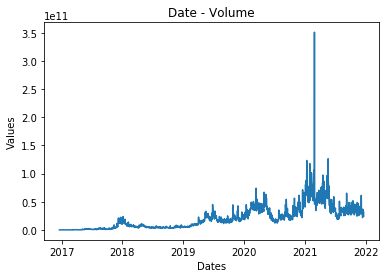

In [10]:
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Date - Volume')
plt.plot(x, y6)
plt.show()

# Linear Regression

In [11]:
linear_model = lm.LinearRegression()

In [12]:
df = data

In [13]:
df['Index'] = df.index

In [14]:
df['Close'] = df.Close.values

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,7.488640e+07,0
1,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,9.962930e+07,1
2,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,1.555760e+08,2
3,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,2.000270e+08,3
4,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,2.755640e+08,4
...,...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10,1822
1823,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10,1823
1824,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10,1824
1825,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10,1825


In [16]:
sc1 = MinMaxScaler(feature_range = (0, 1))
df[['Close']] = sc1.fit_transform(df[['Close']])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,2016-12-19,790.692017,793.611023,790.320007,0.000224,792.713989,7.488640e+07,0
1,2016-12-20,792.247009,801.336975,791.497009,0.000346,800.875977,9.962930e+07,1
2,2016-12-21,800.643982,834.281006,799.405029,0.000846,834.281006,1.555760e+08,2
3,2016-12-22,834.179993,875.781982,834.148987,0.001299,864.539978,2.000270e+08,3
4,2016-12-23,864.888000,925.117004,864.677002,0.002159,921.984009,2.755640e+08,4
...,...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,0.720462,48896.722656,3.654183e+10,1822
1823,2021-12-16,48900.464844,49425.574219,47529.878906,0.702026,47665.425781,2.726815e+10,1823
1824,2021-12-17,47653.730469,48004.894531,45618.214844,0.680117,46202.144531,3.290273e+10,1824
1825,2021-12-18,46219.253906,47313.828125,45598.441406,0.689799,46848.777344,2.609829e+10,1825


In [17]:
data_to_print = df.iloc[1462:,4:5]
data_to_print

,Close
1466,0.343742
1467,0.357649
1468,0.384184
1469,0.381717
1470,0.393883
...,...
1822,0.720462
1823,0.702026
1824,0.680117
1825,0.689799


In [18]:
required = ['Index']
output = 'Close'
train = 100
while(train < len(df)):
    x_train = df[df.Index < train][required]
    y_train = df[df.Index < train][output]
    x_test = df[df.Index >= train][required]
    y_test = df[df.Index >= train][output]
    result = linear_model.fit(x_train, y_train)
    print(train," ",result.score(x_test, y_test))
    train = train + 50

100   -0.3927856085122139
150   -0.26014984168940547
200   0.18173839437607364
250   0.28664411113502397
300   0.3703903613924755
350   0.46463323743895235
400   -0.21609326066085544
450   -0.0006250665838225533
500   0.2986129983469725
550   0.42289310012389136
600   0.4314898088090209
650   0.35939555681228386
700   0.2463111723992496
750   0.02962862134409583
800   -0.20838761137922823
850   -0.41553340183132104
900   -0.5027693250451981
950   -0.460782884511979
1000   -0.4547562633237958
1050   -0.5445144568292797
1100   -0.7003343662622379
1150   -0.8693167282823839
1200   -1.1371239699871687
1250   -1.5031524899692315
1300   -2.0116952709878424
1350   -2.807753720552878
1400   -4.589703242648678
1450   -8.591314338019826
1500   -11.770930507317695
1550   -8.122892093392155
1600   -4.321751835001488
1650   -4.187585036766888
1700   -10.745385589447856
1750   -18.756569539558015
1800   -14.333284619995501


In [19]:
train = 350 #best case for train - test split according to the table above
x_train = df[df.Index < train][required]
y_train = df[df.Index < train][output]
x_test = df[df.Index >= train][required]
y_test = df[df.Index >= train][output]
result = linear_model.fit(x_train, y_train)
result.score(x_test, y_test)

0.46463323743895235

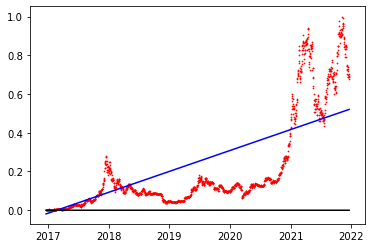

In [20]:
%matplotlib inline
plt.scatter(df.Date, df.Close, s= 0.5, color='red')
plt.plot(df[['Date']], linear_model.predict(df[required]), color = 'blue')
Y = [0]*1823
plt.plot(df[['Date']], Y, color = 'black')

In [21]:
prediction = result.predict(x_test)


In [22]:
mean_squared_error(y_test, prediction)

0.036605687460448344

# Logistic Regression

## without split

In [23]:
data = pd.read_csv("./BTC-USD.csv")
data = data.dropna()

In [24]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,7.488640e+07
1,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,9.962930e+07
2,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,1.555760e+08
3,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,2.000270e+08
4,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,2.755640e+08
...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
1823,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
1824,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
1825,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10


In [25]:
format = '%Y-%m-%d'
data['Date']= pd.to_datetime(data['Date'])
grouped = data.groupby(pd.DatetimeIndex(data['Date']).year)

In [26]:
dflog = data['Close'].pct_change() * 100

In [27]:
dflog = dflog.rename("Today")

In [28]:
dflog = dflog.reset_index()

In [29]:
dflog['Date'] = data['Date']

In [30]:
dflog = dflog[['Date', 'Today']]

In [31]:
dflog

,Date,Today
0,2016-12-19,NaN
1,2016-12-20,1.029626
2,2016-12-21,4.171061
3,2016-12-22,3.626952
4,2016-12-23,6.644462
...,...,...
1818,2021-12-11,4.900152
1819,2021-12-12,-2.518158
1820,2021-12-13,-3.069901
1821,2021-12-14,1.399573


In [32]:
for i in range(1, 3):
    dflog['Lag '+str(i)] = dflog['Today'].shift(i)

In [33]:
dflog['Volume'] = data.Volume.shift(1).values/1000_000_000

In [34]:
dflog = dflog.dropna()

In [35]:
dflog['Direction'] = ['UP' if i > 0.5 else 'DOWN' for i in dflog['Today']]

C:\anaconda3\envs\numenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
dflog

,Date,Today,Lag 1,Lag 2,Volume,Direction
3,2016-12-22,3.626952,4.171061,1.029626,0.155576,UP
4,2016-12-23,6.644462,3.626952,4.171061,0.200027,UP
5,2016-12-24,-2.512190,6.644462,3.626952,0.275564,DOWN
6,2016-12-25,-0.293611,-2.512190,6.644462,0.137727,DOWN
7,2016-12-26,1.275075,-0.293611,-2.512190,0.143665,UP
...,...,...,...,...,...,...
1818,2021-12-11,4.900152,-0.267125,-6.708517,34.638619,UP
1819,2021-12-12,-2.518158,4.900152,-0.267125,36.541829,DOWN
1820,2021-12-13,-3.069901,-2.518158,4.900152,27.268151,DOWN
1821,2021-12-14,1.399573,-3.069901,-2.518158,32.902725,UP


In [37]:
required = ['Lag 1', 'Lag 2', 'Volume']

In [38]:
X = dflog[required]
X

,Lag 1,Lag 2,Volume
3,4.171061,1.029626,0.155576
4,3.626952,4.171061,0.200027
5,6.644462,3.626952,0.275564
6,-2.512190,6.644462,0.137727
7,-0.293611,-2.512190,0.143665
...,...,...,...
1818,-0.267125,-6.708517,34.638619
1819,4.900152,-0.267125,36.541829
1820,-2.518158,4.900152,27.268151
1821,-3.069901,-2.518158,32.902725


In [39]:
y = dflog.Direction
y

3         UP
4         UP
5       DOWN
6       DOWN
7         UP
        ... 
1818      UP
1819    DOWN
1820    DOWN
1821      UP
1822    DOWN
Name: Direction, Length: 1816, dtype: object

In [40]:
logistic_model = lm.LogisticRegression(class_weight="balanced")

In [41]:
result = logistic_model.fit(X, y)

In [42]:
prediction = result.predict_proba(X)[:,1]

In [43]:
prediction, y

(array([0.48859618, 0.49976771, 0.47957059, ..., 0.52523112, 0.50721362,
        0.48166336]),
 3         UP
 4         UP
 5       DOWN
 6       DOWN
 7         UP
         ... 
 1818      UP
 1819    DOWN
 1820    DOWN
 1821      UP
 1822    DOWN
 Name: Direction, Length: 1816, dtype: object)

In [44]:
def confusion_matrix(act,pred):
    predictions = ['UP' if i > 0.5 else 'DOWN' for i in pred]
    actuals = [i for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                  pd.Series(predictions),
                                  rownames=['Actual'],
                                  colnames=['Predicted'])
    return confusion_matrix    

In [45]:
confusion_matrix(y, prediction)

Predicted,DOWN,UP
Actual,,
DOWN,474,518
UP,373,451


In [46]:
result.score(X, y)

0.5093612334801763

## with split

In [47]:
train = 2017
while (train <= 2021):
    x_train = dflog[dflog.Date.dt.year < train][required]
    y_train = dflog[dflog.Date.dt.year < train]['Direction']
    x_test = dflog[dflog.Date.dt.year == train][required]
    y_test = dflog[dflog.Date.dt.year == train]['Direction']
    result = logistic_model.fit(x_train, y_train)
    print(train,result.score(x_test, y_test))
    train = train + 1

2017 0.5095890410958904
2018 0.4575342465753425
2019 0.5945205479452055
2020 0.5441988950276243
2021 0.5214899713467048


In [48]:
train = 2019 #as the most logical and best case senario acording to the values above
x_train = dflog[dflog.Date.dt.year < train][required]
y_train = dflog[dflog.Date.dt.year < train]['Direction']
x_test = dflog[dflog.Date.dt.year == train][required]
y_test = dflog[dflog.Date.dt.year == train]['Direction']

In [49]:
test_dates = dflog[dflog.Date.dt.year == train][["Date"]]
test_dates

,Date
743,2019-01-01
744,2019-01-02
745,2019-01-03
746,2019-01-04
747,2019-01-05
...,...
1103,2019-12-27
1104,2019-12-28
1105,2019-12-29
1106,2019-12-30


In [50]:
result = logistic_model.fit(x_train, y_train)

In [51]:
prediction = result.predict_proba(x_test)[:,1]

In [52]:
confusion_matrix(y_test, prediction)

Predicted,DOWN,UP
Actual,,
DOWN,212,4
UP,144,5


In [53]:
result.score(x_test, y_test)

0.5945205479452055

In [54]:
dflog['Binary'] = [1 if i == 'UP' else 0 for i in dflog['Direction']]

C:\anaconda3\envs\numenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
loss = log_loss(y_test, prediction)
loss

0.6871618363874309

# Neural Network

In [56]:
import tensorflow as tf 
from tensorflow import keras

In [57]:
data = pd.read_csv("./BTC-USD.csv")
data = data.dropna()

In [58]:
dfnn = data
dfnn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,7.488640e+07
1,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,9.962930e+07
2,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,1.555760e+08
3,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,2.000270e+08
4,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,2.755640e+08
...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
1823,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
1824,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
1825,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10


In [59]:
format = '%Y-%m-%d'
data['Date']= pd.to_datetime(data['Date'])
grouped = data.groupby(pd.DatetimeIndex(data['Date']).year)

In [60]:
sc1 = MinMaxScaler(feature_range = (0, 1))
dfnn[['Close']] = sc1.fit_transform(dfnn[['Close']])
dfnn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-19,790.692017,793.611023,790.320007,0.000224,792.713989,7.488640e+07
1,2016-12-20,792.247009,801.336975,791.497009,0.000346,800.875977,9.962930e+07
2,2016-12-21,800.643982,834.281006,799.405029,0.000846,834.281006,1.555760e+08
3,2016-12-22,834.179993,875.781982,834.148987,0.001299,864.539978,2.000270e+08
4,2016-12-23,864.888000,925.117004,864.677002,0.002159,921.984009,2.755640e+08
...,...,...,...,...,...,...,...
1822,2021-12-15,48379.753906,49473.957031,46671.964844,0.720462,48896.722656,3.654183e+10
1823,2021-12-16,48900.464844,49425.574219,47529.878906,0.702026,47665.425781,2.726815e+10
1824,2021-12-17,47653.730469,48004.894531,45618.214844,0.680117,46202.144531,3.290273e+10
1825,2021-12-18,46219.253906,47313.828125,45598.441406,0.689799,46848.777344,2.609829e+10


In [61]:
training_set, testing_set = train_test_split(dfnn['Close'], test_size=0.2, shuffle = False)

In [62]:
training_set = pd.DataFrame(training_set)
training_set

,Close
0,0.000224
1,0.000346
2,0.000846
3,0.001299
4,0.002159
...,...
1457,0.279077
1458,0.307428
1459,0.329806
1460,0.334788


In [63]:
testing_set = pd.DataFrame(testing_set)
testing_set

,Close
1462,0.339869
1463,0.329774
1464,0.344447
1465,0.336336
1466,0.343742
...,...
1822,0.720462
1823,0.702026
1824,0.680117
1825,0.689799


In [64]:
sc = MinMaxScaler(feature_range = (0, 1))
testing_set_array = np.array(sc.fit_transform(testing_set))
training_set_array = np.array(sc.fit_transform(training_set))

In [65]:
X_train = []
y_train = []
for i in range(60, 1458):
    X_train.append(training_set_array[i-60:i, 0])
    y_train.append(training_set_array[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)

[[[6.47710091e-04]
  [1.00116417e-03]
  [2.44776561e-03]
  ...
  [9.82124685e-03]
  [9.94812986e-03]
  [1.08124940e-02]]

 [[1.00116417e-03]
  [2.44776561e-03]
  [3.75812736e-03]
  ...
  [9.94812986e-03]
  [1.08124940e-02]
  [1.16253278e-02]]

 [[2.44776561e-03]
  [3.75812736e-03]
  [6.24573538e-03]
  ...
  [1.08124940e-02]
  [1.16253278e-02]
  [1.19808646e-02]]

 ...

 [[4.63605040e-01]
  [4.74807053e-01]
  [4.82355004e-01]
  ...
  [7.99793327e-01]
  [8.07173853e-01]
  [8.89172611e-01]]

 [[4.74807053e-01]
  [4.82355004e-01]
  [5.21647900e-01]
  ...
  [8.07173853e-01]
  [8.89172611e-01]
  [9.53894575e-01]]

 [[4.82355004e-01]
  [5.21647900e-01]
  [5.27805950e-01]
  ...
  [8.89172611e-01]
  [9.53894575e-01]
  [9.68306395e-01]]]


In [66]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [67]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 1, activation = 'sigmoid'))
regressor.add(Dropout(0.2))

In [68]:
# Compiling the model 
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model 
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 50)

Epoch 1/10
28/28 [==============================] - 6s 82ms/step - loss: 0.0531
Epoch 2/10
28/28 [==============================] - 2s 74ms/step - loss: 0.0304
Epoch 3/10
28/28 [==============================] - 2s 73ms/step - loss: 0.0279
Epoch 4/10
28/28 [==============================] - 2s 80ms/step - loss: 0.0258
Epoch 5/10
28/28 [==============================] - 2s 84ms/step - loss: 0.0273
Epoch 6/10
28/28 [==============================] - 2s 84ms/step - loss: 0.0268
Epoch 7/10
28/28 [==============================] - 2s 80ms/step - loss: 0.0241
Epoch 8/10
28/28 [==============================] - 2s 77ms/step - loss: 0.0229
Epoch 9/10
28/28 [==============================] - 2s 80ms/step - loss: 0.0216
Epoch 10/10
28/28 [==============================] - 2s 76ms/step - loss: 0.0251


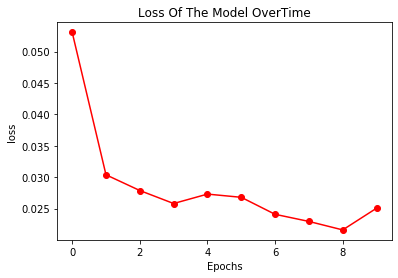

In [69]:
def plot_graphs(history, string):
    plt.plot(history.history[string], 'ro-')
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'loss')

In [70]:
testing_set_array

array([[0.01506158],
       [0.        ],
       [0.02189154],
       [0.00979059],
       [0.02083979],
       [0.04158966],
       [0.08118076],
       [0.0775005 ],
       [0.09565166],
       [0.10185375],
       [0.13488306],
       [0.13847453],
       [0.14679447],
       [0.2082977 ],
       [0.22292463],
       [0.20482718],
       [0.24996451],
       [0.3132285 ],
       [0.37012007],
       [0.40198886],
       [0.38985711],
       [0.34745437],
       [0.28513195],
       [0.24841261],
       [0.32421945],
       [0.36601597],
       [0.31325093],
       [0.29879221],
       [0.29014987],
       [0.30888818],
       [0.29637204],
       [0.28470959],
       [0.17922131],
       [0.22792283],
       [0.20696571],
       [0.21191919],
       [0.21363964],
       [0.21818477],
       [0.17043848],
       [0.19762697],
       [0.25720155],
       [0.25615464],
       [0.23034885],
       [0.23979436],
       [0.28387273],
       [0.3276984 ],
       [0.3155005 ],
       [0.342

In [71]:
testing_set_array = np.reshape(testing_set_array, (testing_set_array.shape[0], testing_set_array.shape[1], 1))
testing_set_array

array([[[0.01506158]],

       [[0.        ]],

       [[0.02189154]],

       [[0.00979059]],

       [[0.02083979]],

       [[0.04158966]],

       [[0.08118076]],

       [[0.0775005 ]],

       [[0.09565166]],

       [[0.10185375]],

       [[0.13488306]],

       [[0.13847453]],

       [[0.14679447]],

       [[0.2082977 ]],

       [[0.22292463]],

       [[0.20482718]],

       [[0.24996451]],

       [[0.3132285 ]],

       [[0.37012007]],

       [[0.40198886]],

       [[0.38985711]],

       [[0.34745437]],

       [[0.28513195]],

       [[0.24841261]],

       [[0.32421945]],

       [[0.36601597]],

       [[0.31325093]],

       [[0.29879221]],

       [[0.29014987]],

       [[0.30888818]],

       [[0.29637204]],

       [[0.28470959]],

       [[0.17922131]],

       [[0.22792283]],

       [[0.20696571]],

       [[0.21191919]],

       [[0.21363964]],

       [[0.21818477]],

       [[0.17043848]],

       [[0.19762697]],

       [[0.25720155]],

       [[0.25615

In [72]:
prediction_prices = regressor.predict(testing_set_array)

In [73]:
print(prediction_prices)

[[0.2647791 ]
 [0.26468956]
 [0.2648198 ]
 [0.26474777]
 [0.26481354]
 [0.26493752]
 [0.26517558]
 [0.26515338]
 [0.2652631 ]
 [0.2653007 ]
 [0.26550168]
 [0.26552358]
 [0.26557446]
 [0.26595324]
 [0.26604402]
 [0.26593173]
 [0.26621252]
 [0.26661023]
 [0.26697204]
 [0.2671764 ]
 [0.26709846]
 [0.26682743]
 [0.266433  ]
 [0.26620284]
 [0.26667985]
 [0.26694578]
 [0.26661035]
 [0.26651907]
 [0.2664646 ]
 [0.2665828 ]
 [0.2665038 ]
 [0.26643035]
 [0.26577356]
 [0.2660751 ]
 [0.265945  ]
 [0.2659757 ]
 [0.26598638]
 [0.26601458]
 [0.2657195 ]
 [0.2658872 ]
 [0.2662578 ]
 [0.2662512 ]
 [0.2660902 ]
 [0.26614904]
 [0.26642507]
 [0.2667019 ]
 [0.26662463]
 [0.26679727]
 [0.266957  ]
 [0.2669053 ]
 [0.26796067]
 [0.26800248]
 [0.26777345]
 [0.268213  ]
 [0.26815325]
 [0.26809436]
 [0.26833263]
 [0.26821828]
 [0.26840425]
 [0.26884478]
 [0.26877433]
 [0.26941025]
 [0.26944244]
 [0.2696625 ]
 [0.2691551 ]
 [0.26834852]
 [0.2684794 ]
 [0.26809266]
 [0.2679817 ]
 [0.26795948]
 [0.26780555]
 [0.26

In [74]:
sc = MinMaxScaler(feature_range = (0, 1))
prediction_prices = sc.fit_transform(prediction_prices)

In [75]:
indexes = [x for x in range(1462, 1827)]

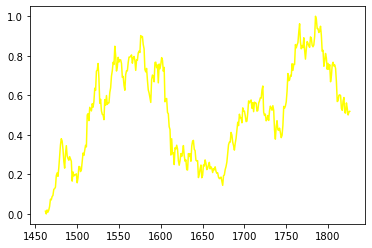

In [76]:
plt.plot(indexes, prediction_prices, color='yellow', label='Prediction Prices')
plt.show()

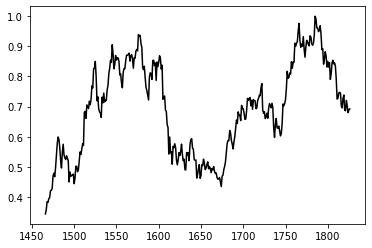

In [77]:
plt.plot(data_to_print, color='black', label='Actual values')

In [79]:
nn_mse = mean_squared_error(data_to_print, prediction_prices[:len(prediction_prices)-4])
nn_mse

0.04212911028107101

### Results

| | Method  | Accuracy   | Loss   |
|---:|:-------------|:-----------|:------|
| 1 | Linear Regression  | 0.464633237       | 0.0366056874   |
| 2 | Logistic Regression  | 0.594520548    | 0.6871618364   |
| 2 | Neural Network  |    -    | 0.0378802791   |